In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [38]:
for_pred = pd.read_csv("Data/features_30_sec.csv")
music_data = pd.read_csv("Data/features_30_sec.csv")

music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [39]:
# path = "Data/genres_original/blues/blues.00000.wav"
# plt.figure(figsize=(14,5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='blue')
# print("Blue")

In [40]:
# path = "Data/genres_original/metal/metal.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='orange')
# print('Metal')

In [41]:
# path = "Data/genres_original/pop/pop.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='purple')
# print('Pop')

In [42]:
# path = "Data/genres_original/hiphop/hiphop.00000.wav"
# plt.figure(figsize=(14, 5))
# data, samplin_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='grey')
# print("Hip-Hop")

In [43]:
# path = "Data/genres_original/country/country.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='brown')
# print("Country")

In [44]:
#Computing the correlation matrix
# spike_col = [col for col in music_data.columns if 'mean' in col]
# print(spike_col)

# #Matplotlib Figure
# f, ax = plt.subplots(figsize= (16, 11))

# #Draw the heatmap 
# sns.heatmap(music_data[spike_col].corr(), cmap="YlGn")
# plt.title('Heatmap for MEAN variables', fontsize=20)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

In [45]:
music_data = music_data.drop(['filename', 'length'], axis = 1)
#Data Preprocessing
label_encode = preprocessing.LabelEncoder()
# class_list = music_data.iloc[:, -1]

X = music_data.iloc[:,:-1]
y = music_data.iloc[:,-1]



#filename column is not relevant, so dropping filename column
# y = label_encode.fit_transform(class_list)
# X = music_data.drop(['label', 'filename', 'length'], axis=1)

#Scaling data to make model more stable and train fast
# cols = X.columns
# minmax = preprocessing.StandardScaler()
# np_scaled = minmax.fit_transform(X)

# #New DataFrame with new Scaled Data
# X = pd.DataFrame(np_scaled, columns = cols)

# X.head()

In [46]:
#Splitting Data into Testing Data & Training Data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

y_train = label_encode.fit_transform(y_train)
y_test = label_encode.transform(y_test)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size)

def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()



model = keras.models.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax"),
    
])




c:\Users\Jadge\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
# model.compile(optimizer=adam, 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
# hist = model.fit(X_train, y_train, validation_data= (X_test, y_test),
#                 epochs=100,
#                 batch_size=32)

model_history = trainModel(model=model, epochs=100, optimizer='adam')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1858 - loss: 2.1779 - val_accuracy: 0.3850 - val_loss: 1.6559
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4703 - loss: 1.4754 - val_accuracy: 0.4950 - val_loss: 1.3597
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5855 - loss: 1.1717 - val_accuracy: 0.5200 - val_loss: 1.2279
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.8805 - val_accuracy: 0.5800 - val_loss: 1.1589
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.7566 - val_accuracy: 0.6450 - val_loss: 1.0564
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7410 - loss: 0.6655 - val_accuracy: 0.6400 - val_loss: 1.0278
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7692 - loss: 0.6351 - val_accuracy: 0.6650 - val_loss: 1.0127
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8224 - loss: 0.5241 - val_accuracy: 0.6750 - 

In [48]:
#Test Accuracy
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7566 - loss: 1.8049 
Test Accuracy: 0.75


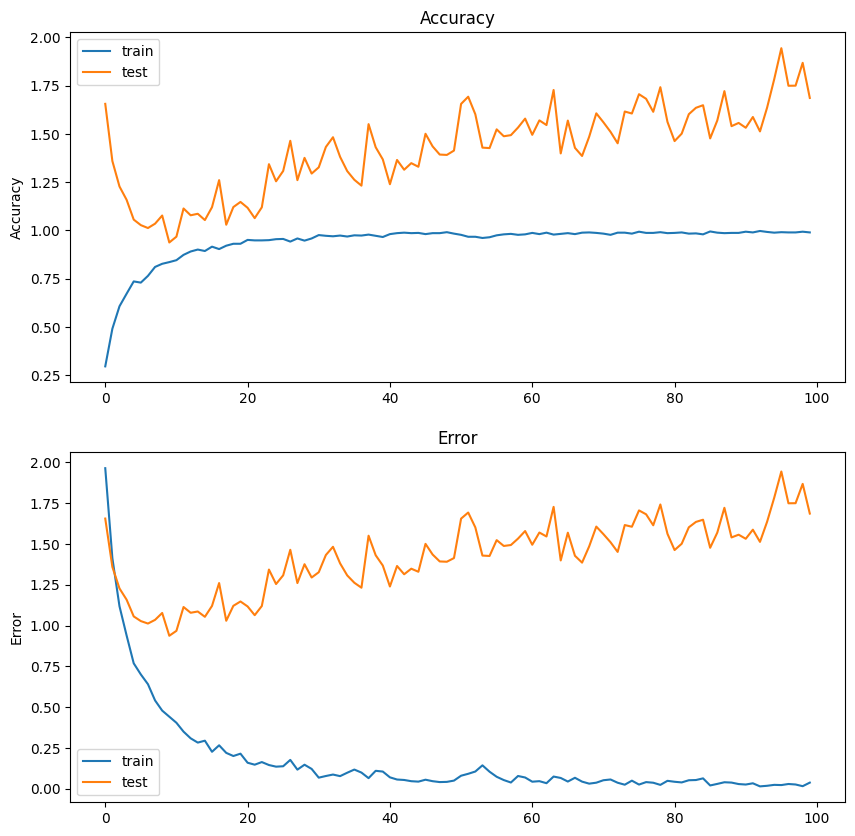

In [49]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(model_history.history['accuracy'], label="train")
axs[0].plot(model_history.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

#Error
axs[1].plot(model_history.history["loss"], label="train") 
axs[1].plot(model_history.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
      
plt.show()

In [64]:
import numpy as np
pr = np.array([0.35008812, 0.088756569, 0.130227923, 0.002826696, 1784.16585, 129774.0645, 2002.44906, 85882.76132, 3805.839606, 
               901505.4255, 0.083044821, 0.000766946, -4.53E-05, 0.008172282, 7.78E-06, 0.005698182, 123.046875, -113.5706482, 
               2564.20752, 121.5717926, 295.9138184, -19.16814232, 235.5744324, 42.36642075, 151.1068726, -6.364664078, 167.9347992, 
               18.62349892, 89.18083954, -13.7048912, 67.66049194, 15.34315014, 68.93257904, -12.27410984, 82.20420074, 10.97657204, 
               63.38631058, -8.326573372, 61.77309418, 8.803792, 51.24412537, -3.6723001, 41.21741486, 5.7479949, 40.55447769, 
               -5.162881851, 49.77542114, 0.752740204, 52.42090988, -1.690214634, 36.52407074, -0.408979177, 41.59710312, 
               -2.303522587, 55.06292343, 1.221290708, 46.93603516]).reshape(1, -1) 
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [68]:
display(X_train[0])

array([-1.19734518,  2.55642383, -0.09413214,  0.44871751, -0.75348653,
        0.5587002 , -0.09785842,  0.47715643, -0.49838984,  1.59681848,
       -1.20708828,  0.06905071,  0.23329397,  0.35981665,  0.3863926 ,
       -0.660564  ,  0.36575793, -0.85532982, -0.04149655,  0.0373737 ,
        0.37139227,  1.17680395, -0.33239138, -0.71747906, -0.02226051,
        0.24391197,  0.5174721 ,  1.01319315,  0.12462303, -1.2099476 ,
        3.90450409,  0.5214676 ,  0.61433602, -1.85475779,  0.26199593,
       -0.37172441,  1.09953289, -2.51331611,  2.29215768, -1.55692084,
        0.3772776 , -0.08730992,  0.36980658, -0.10526173,  1.08175994,
       -0.41052426,  0.80520399, -2.09166077,  0.79888983, -1.68277279,
        1.12978965, -1.8362919 ,  0.99673628, -2.04151213,  0.22125837,
       -3.41637288,  0.1740439 ])

In [67]:
display(X_test[0])
display(y_test[0])


array([ 0.68221918,  0.06206651, -1.25032485, -0.71980763,  0.98078152,
       -0.03490142,  0.32393069, -0.85110693,  0.79729869, -0.55101164,
        1.89000915,  1.4035169 ,  0.26095081, -0.96148576,  0.68256672,
       -0.76989132,  0.14764896, -0.27968895, -0.88451134, -0.75078852,
       -0.08589822, -0.20422727, -0.69063509,  1.01595921, -1.3174486 ,
       -2.357925  , -1.14383173,  0.74128873, -1.18797438, -1.74630427,
       -1.0358149 ,  0.86153674, -1.3992614 , -2.14446325, -1.08817109,
        1.74312734, -1.0882161 , -1.15241457, -1.22639405,  1.32851509,
       -1.08763193, -0.54619675, -1.23447165,  1.31212474, -0.76866414,
       -0.44916815, -0.39543443,  1.93730436, -0.23995172, -0.47772314,
       -0.55398795,  0.50806028, -0.18163872, -0.29243335,  0.06234857,
        0.94596436, -0.26275888])

5

In [61]:
predicts = pd.DataFrame(predictions)
predicts.columns = list(set(y_test))
predict = []
for pred in predictions:
    predict.append(np.argmax(pred))

predicts['Label'] = predict

ValueError: Length of values (10) does not match length of index (200)

In [53]:
predicts['Real'] = list(y_test.copy())
pd.set_option('display.max_columns', None)
print(predicts)

                0             1             2             3             4  \
0    1.180008e-06  1.398810e-06  9.299913e-09  5.021683e-06  1.609426e-09   
1    9.707065e-15  1.610487e-13  5.289400e-11  1.511543e-09  3.500648e-09   
2    2.258696e-09  1.289428e-06  4.857806e-06  8.343623e-08  9.659554e-08   
3    1.849857e-08  9.597447e-09  1.088588e-10  2.005557e-10  9.864951e-08   
4    3.749306e-07  8.007932e-14  7.706000e-11  1.776126e-09  9.999992e-01   
..            ...           ...           ...           ...           ...   
195  5.879410e-10  3.528505e-18  2.635102e-15  4.162541e-13  1.000000e+00   
196  5.447185e-06  7.423549e-07  1.397521e-05  9.944755e-01  5.085065e-05   
197  2.392518e-10  2.957785e-11  9.999433e-01  2.914904e-10  3.217481e-11   
198  8.089235e-15  3.852652e-17  1.081338e-20  1.626678e-19  3.106124e-14   
199  8.889514e-01  3.653511e-06  8.001446e-04  1.360041e-04  6.251440e-05   

                5             6             7             8             9  

In [54]:
display(predicts['Label'], predicts['Real'])

0      5
1      7
2      7
3      6
4      4
      ..
195    4
196    3
197    2
198    6
199    0
Name: Label, Length: 200, dtype: int64

0      5
1      7
2      7
3      6
4      4
      ..
195    4
196    3
197    2
198    6
199    0
Name: Real, Length: 200, dtype: int32

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(list(y_test.copy()),predict)

In [56]:
display(list(set(y_test)))





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

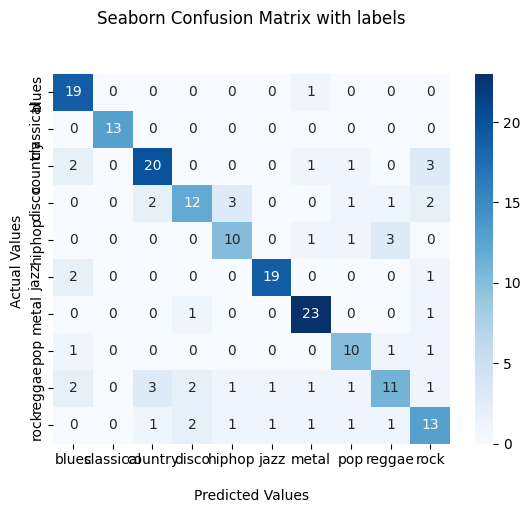

In [57]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([
 'blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock'
 ])
ax.yaxis.set_ticklabels([
 'blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock'
 ])

## Display the visualization of the Confusion Matrix.
plt.show()

In [58]:
model.save('genre_model.h5')

In [59]:
import pickle
with open('music_genre_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)